In [1]:
# imports
import numpy as np
np.random.seed(42)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# converting the categorical target feature into a numerical one
df['species'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [4]:
# creating X & y; converting a vector of integers (y) into a one-hot-encoded vector
X = df.drop(['species'], axis=1)
y = to_categorical(y=df['species'], num_classes=3)

In [5]:
# splitting the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# defining an MLP architecture
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=4))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

In [8]:
# model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# model training
history = model.fit(X_train, y_train, batch_size=50, epochs=500, validation_data=(X_test, y_test), verbose=0)

In [10]:
# model evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Loss:', round((score[0] * 100), 2))
print('Accuracy:', round((score[1] * 100), 2))

Loss: 3.91
Accuracy: 100.0


## confusion matrix

In [11]:
# confusion matrix
print(confusion_matrix(
    y_true = np.argmax(y_test, axis=1),
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    ))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


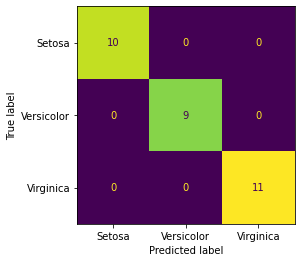

In [12]:
# plotting confusion matrix
cm = confusion_matrix(
    y_true = np.argmax(y_test, axis=1),
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1))
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['Setosa', 'Versicolor', 'Virginica'])
disp.plot(colorbar=False);

## classification report

In [13]:
# getting the argmax of true values
y_test = np.argmax(y_test, axis=1)
print(y_test)
print(y_test.shape)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
(30,)


In [14]:
# making predictions
y_pred = model.predict(X_test, verbose=0)
print(y_pred)
print(y_pred.shape)

[[1.3066895e-03 7.0222664e-01 2.9646668e-01]
 [9.9517691e-01 3.9242748e-03 8.9875230e-04]
 [1.6368429e-06 2.7720234e-05 9.9997061e-01]
 [6.5382774e-04 9.9465728e-01 4.6888152e-03]
 [6.2369034e-03 9.6739185e-01 2.6371300e-02]
 [9.9501395e-01 4.0614433e-03 9.2456932e-04]
 [4.3515542e-05 9.9994308e-01 1.3375887e-05]
 [2.0709415e-03 2.8284609e-03 9.9510050e-01]
 [2.0489234e-03 9.8708671e-01 1.0864484e-02]
 [3.0852747e-04 9.9953049e-01 1.6091829e-04]
 [2.0316949e-03 3.1443141e-02 9.6652514e-01]
 [9.9727952e-01 2.1691786e-03 5.5126211e-04]
 [9.9801278e-01 1.5658902e-03 4.2133688e-04]
 [9.9668664e-01 2.6609236e-03 6.5242825e-04]
 [9.9868357e-01 1.0204336e-03 2.9595461e-04]
 [7.8602729e-04 9.9618256e-01 3.0314270e-03]
 [3.3477103e-05 5.3705403e-04 9.9942935e-01]
 [5.2809570e-04 9.9895930e-01 5.1242916e-04]
 [6.4234104e-04 9.9160987e-01 7.7477721e-03]
 [1.1731370e-05 1.9442321e-04 9.9979377e-01]
 [9.9679846e-01 2.5680424e-03 6.3359149e-04]
 [6.7057088e-03 4.7375363e-01 5.1954055e-01]
 [9.959647

In [15]:
# getting the argmax of predictions
rounded_pred = np.argmax(y_pred, axis=-1)
print(rounded_pred)
print(rounded_pred.shape)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
(30,)


In [16]:
# plotting the classification report
print(classification_report(y_test, rounded_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## easy way of plotting a classification report
    
    print(classification_report(
      y_true = np.argmax(y_test, axis=1), 
      y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)))